## REAL ESTATE PRICE PREDICTION

In [1]:
import pandas as pd

In [2]:
housing = pd.read_excel("data.xlsx")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

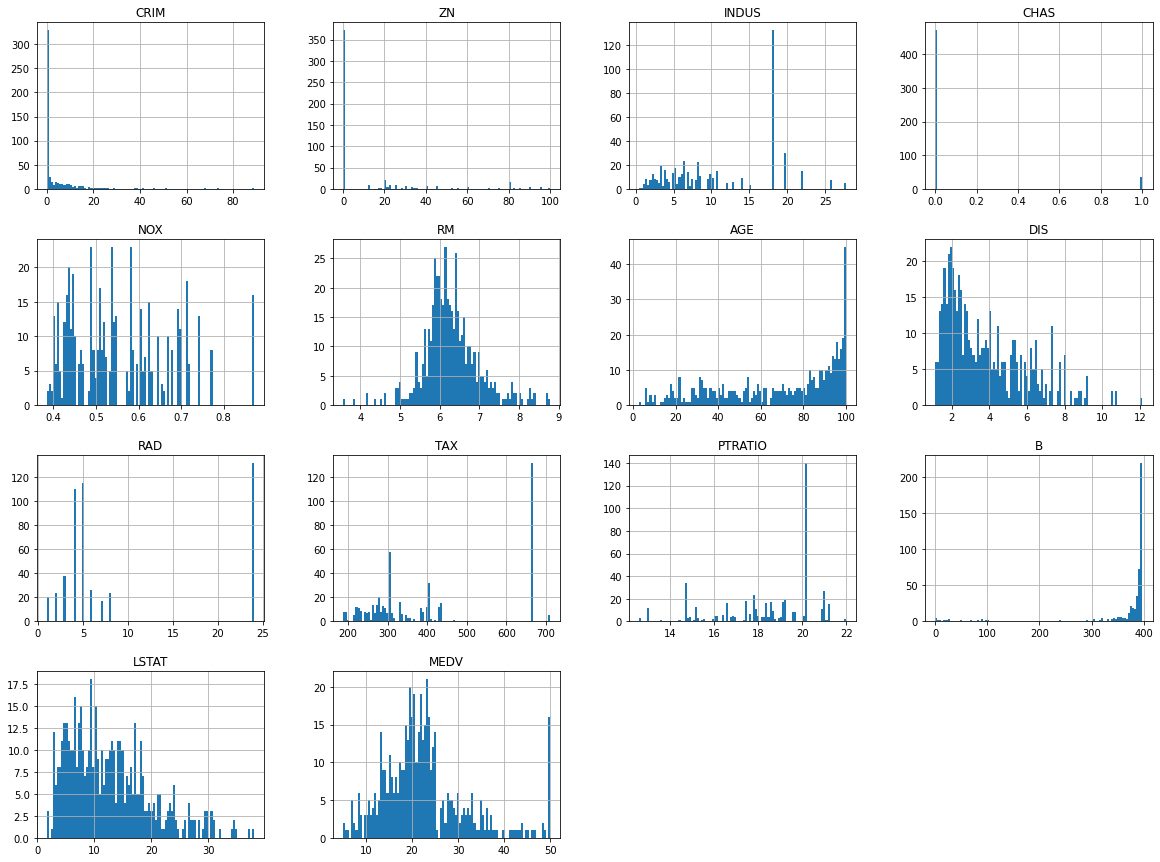

In [8]:
housing.hist(bins=100, figsize=(20,15))
plt.show()

#### Train - Test splitting

My code

In [9]:
import numpy as np

In [10]:
len(housing)

506

In [11]:
def split_train_set(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set , test_set = split_train_set(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [13]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4


In [14]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


From sklearn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
train_set.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9


In [18]:
test_set.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.5,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.9,3.53,32.4


Stratified Shuffle

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
h_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in h_split.split(housing, housing['CHAS']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [21]:
strat_test_set.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1


In [22]:
strat_train_set.value_counts(['CHAS'])

CHAS
0       376
1        28
dtype: int64

In [23]:
strat_test_set.value_counts(['CHAS'])

CHAS
0       95
1        7
dtype: int64

In [24]:
housing = strat_train_set.copy()

#### Looking for Correlation

In [25]:
corr_matrix = housing.corr()

In [26]:
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.212927  0.416640 -0.061482  0.430879 -0.257375  0.361890   
ZN      -0.212927  1.000000 -0.542161 -0.023536 -0.509327  0.293363 -0.565680   
INDUS    0.416640 -0.542161  1.000000  0.043686  0.759051 -0.382255  0.644114   
CHAS    -0.061482 -0.023536  0.043686  1.000000  0.077490  0.100082  0.058388   
NOX      0.430879 -0.509327  0.759051  0.077490  1.000000 -0.300178  0.727358   
RM      -0.257375  0.293363 -0.382255  0.100082 -0.300178  1.000000 -0.241281   
AGE      0.361890 -0.565680  0.644114  0.058388  0.727358 -0.241281  1.000000   
DIS     -0.386900  0.666939 -0.708612 -0.088081 -0.763623  0.206304 -0.734827   
RAD      0.648221 -0.306480  0.580908 -0.023005  0.596012 -0.199079  0.449489   
TAX      0.603934 -0.322803  0.716288 -0.048802  0.659049 -0.281568  0.501491   
PTRATIO  0.305603 -0.390570  0.384465 -0.132682  0.164977 -0.329010  0.259633   
B       -0.486869  0.188575 

In [27]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [28]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

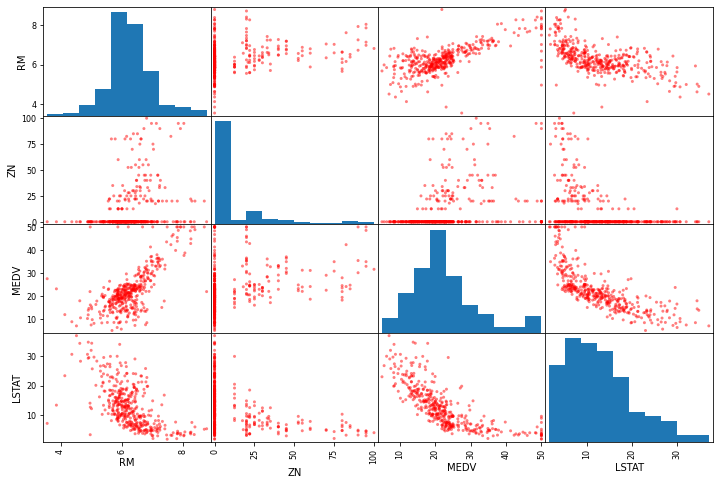

In [29]:
attributes = ['RM', 'ZN', 'MEDV', "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8), c='r')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

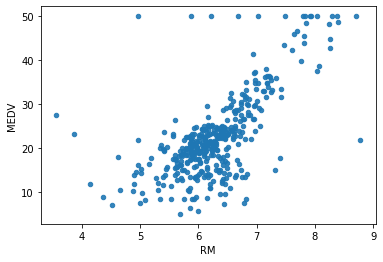

In [30]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.9)

#### Trying Out Attribute Combinations

In [31]:
housing['TAXRM'] = housing["TAX"]/housing['RM']

In [32]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [33]:
corr_matrix = housing.corr()


In [34]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

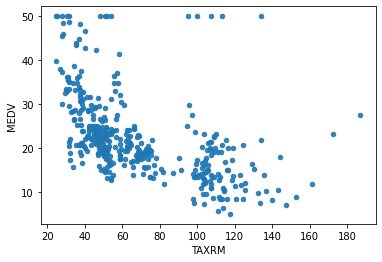

In [35]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.9)

#### Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Impute to fill blank spaces
Standard scalar to scale the data

In [37]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler())
])

In [38]:
def Feature_Label_Splitting(data, label):
    data_x = data.drop(label, axis=1)
    data_y = pd.DataFrame(data['MEDV'])
    return data_x, data_y

In [39]:
housing_x, housing_y = Feature_Label_Splitting(housing, "MEDV")

In [40]:
housing_n_x = my_pipeline.fit_transform(housing_x)

In [41]:
housing_n_y = (housing_y.to_numpy()).reshape(len(housing_y))

In [42]:
housing_n_y.shape

(404,)

In [43]:
housing_n_x

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.50635717],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80462611],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.12141466],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02444134],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.10087256],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65584432]])

In [44]:
housing_x_df = pd.DataFrame(housing_n_x, columns=housing_x.columns)

In [45]:
housing_x_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
0,-0.439420,3.126282,-1.121650,-0.272888,-1.422627,-0.241410,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910,-0.506357
1,-0.443522,3.126282,-1.358938,-0.272888,-1.054257,0.498654,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167,-0.804626
2,0.156823,-0.489831,0.983368,-0.272888,0.479194,0.286605,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802,1.121415
3,-0.422929,-0.489831,-0.577199,-0.272888,-0.557384,0.134941,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398,-0.715123
4,-0.407863,-0.489831,-0.577199,-0.272888,-0.557384,0.045066,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028,-0.700596


In [46]:
housing_x_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,6.155692e-17,-3.627461e-17,1.143200e-16,7.035077e-17,-4.396923e-17,4.506846e-17,-7.474769e-17,1.626861e-16,7.474769e-17,-8.354153e-17,-7.430800e-16,-4.781654e-16,-2.066554e-16,1.011292e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.445960e-01,-4.898311e-01,-1.543818e+00,-2.728884e-01,-1.448328e+00,-3.818154e+00,-2.343452e+00,-1.248110e+00,-1.001686e+00,-1.337627e+00,-2.573710e+00,-3.679748e+00,-1.530642e+00,-1.363362e+00
25%,-4.346270e-01,-4.898311e-01,-8.960085e-01,-2.728884e-01,-9.000550e-01,-5.633454e-01,-8.570894e-01,-8.157735e-01,-6.576668e-01,-7.618351e-01,-5.046855e-01,2.212050e-01,-8.225115e-01,-7.218406e-01
50%,-4.099313e-01,-4.898311e-01,-2.103490e-01,-2.728884e-01,-1.718802e-01,-9.817215e-02,3.245603e-01,-2.976495e-01,-5.429938e-01,-4.472273e-01,2.476870e-01,3.914755e-01,-1.690392e-01,-4.307418e-01
75%,1.596030e-02,7.518650e-02,9.833681e-01,-2.728884e-01,6.248287e-01,4.919835e-01,8.879256e-01,6.459421e-01,1.635794e+00,1.505715e+00,8.119664e-01,4.401987e-01,5.965162e-01,9.814709e-01
max,8.644855e+00,4.030310e+00,2.386714e+00,3.664502e+00,2.680852e+00,3.510870e+00,1.096973e+00,3.997357e+00,1.635794e+00,1.772835e+00,1.658385e+00,4.534347e-01,3.347050e+00,3.804894e+00


#### Selecting a desired model

In [47]:
from sklearn.linear_model import LinearRegression

Linear Regression

In [48]:
model = LinearRegression()
model.fit(housing_n_x, housing_n_y)

LinearRegression()

In [49]:
some_data = housing.iloc[0:5]
some_data_x, some_data_y = Feature_Label_Splitting(some_data, 'MEDV')
prep_data_x = my_pipeline.transform(some_data_x)

In [50]:
prep_data_x.shape

(5, 14)

In [51]:
output_y = model.predict(prep_data_x)
print(output_y)

[22.60509741 26.91434055 18.85838542 24.9820058  24.13451146]


In [52]:
some_data_y.to_numpy()

array([[21.9],
       [24.5],
       [16.7],
       [23.1],
       [23. ]])

Evalutaing the model

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
housing_pred = model.predict(housing_n_x)
lin_mse = mean_squared_error(housing_n_y, housing_pred)

In [55]:
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4.217481617985452


Decision Tree model

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
model2 = DecisionTreeRegressor()
model2.fit(housing_n_x, housing_n_y)

DecisionTreeRegressor()

In [58]:
some_data = housing.iloc[0:5]
some_data_x, some_data_y = Feature_Label_Splitting(some_data, 'MEDV')
prep_data_x = my_pipeline.transform(some_data_x)

In [59]:
output_y = model.predict(prep_data_x)
print(output_y)

[22.60509741 26.91434055 18.85838542 24.9820058  24.13451146]


In [60]:
some_data_y.to_numpy()

array([[21.9],
       [24.5],
       [16.7],
       [23.1],
       [23. ]])

In [61]:
housing_pred = model2.predict(housing_n_x)
dt_mse = mean_squared_error(housing_n_y, housing_pred)
dt_rmse = np.sqrt(lin_mse)
print(dt_rmse)
# Overfitting

4.217481617985452


Cross Validation

In [62]:
#Using error different set in training set by splitting it into k folds

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
scores = cross_val_score(model, housing_n_x, housing_n_y, scoring='neg_mean_squared_error', cv=10)
mod1_rmse_scores = np.sqrt(-scores)
print(mod1_rmse_scores)
print(np.average(mod1_rmse_scores))
print(np.std(mod1_rmse_scores))

[3.24899381 3.21816289 4.23435615 3.70055056 4.89657477 3.69744653
 7.49422423 4.15723713 3.43326118 5.10757486]
4.318838211798886
1.2239657125417343


In [65]:
scores = cross_val_score(model2, housing_n_x, housing_n_y, scoring='neg_mean_squared_error', cv=10)
mod2_rmse_scores = np.sqrt(-scores)
print(mod2_rmse_scores)
print(np.average(mod2_rmse_scores))
print(np.std(mod2_rmse_scores))

[3.66815565 4.22977252 5.30786347 4.34283823 3.70860486 3.07802697
 5.1567674  3.9979995  3.63871543 4.15998798]
4.128873201078319
0.6522316225216921


Random forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model3 = RandomForestRegressor()
model3.fit(housing_n_x, housing_n_y)

RandomForestRegressor()

In [68]:
some_data = housing.iloc[0:5]
some_data_x, some_data_y = Feature_Label_Splitting(some_data, 'MEDV')
prep_data_x = my_pipeline.transform(some_data_x)

In [69]:
output_y = model.predict(prep_data_x)
print(output_y)

[22.60509741 26.91434055 18.85838542 24.9820058  24.13451146]


In [70]:
housing_pred = model3.predict(housing_n_x)
rf_mse = mean_squared_error(housing_n_y, housing_pred)
rf_rmse = np.sqrt(lin_mse)
print(dt_rmse)
#overfitting

4.217481617985452


In [71]:
scores = cross_val_score(model3, housing_n_x, housing_n_y, scoring='neg_mean_squared_error', cv=10)
mod3_rmse_scores = np.sqrt(-scores)
print(mod3_rmse_scores)
print(np.average(mod3_rmse_scores))
print(np.std(mod3_rmse_scores))

[2.9121538  3.02233583 4.46924978 2.65596976 3.30572942 2.51369702
 4.58841662 3.23888012 3.32854011 3.18874329]
3.322371574873909
0.6557200618918243


Choose Random Forest and saving

In [72]:
from joblib import dump, load

In [73]:
dump(model3, "Price_pred.joblib")

['Price_pred.joblib']

#### Testing

In [74]:
test_x, test_y = Feature_Label_Splitting(strat_test_set, 'MEDV')

In [75]:
test_x['TAXRM'] = test_x["TAX"]/test_x['RM']

In [76]:
test_x_prep = my_pipeline.transform(test_x)

In [77]:
test_n_y = (test_y.to_numpy()).reshape(len(test_y))

In [90]:
final_pred = model3.predict(test_x_prep)
final_mse = mean_squared_error(test_n_y, final_pred)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

2.9159843762189355
